# Book Recommendation

Data:
https://www.kaggle.com/code/fahadmehfoooz/book-recommendation-system/input

Goal:
- recommend the top k books to a user
- use another libray as scikit-surprise because it is unmaintained and doesnt work anymore for python 3.12
- use one algorithm where i can use HPO

## Imports

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from PIL import Image

pd.set_option('display.max_colwidth', None)

### Data Overview

In [118]:
books_df = pd.read_csv("./data/books/Books.csv").set_index("ISBN")
books_df.head()

C:\Users\Eric User\AppData\Local\Temp\ipykernel_4620\2748821274.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books_df = pd.read_csv("./data/books/Books.csv").set_index("ISBN")


,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
ISBN,,,,,,,
0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [119]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271360 entries, 0195153448 to 0767409752
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Book-Title           271360 non-null  object
 1   Book-Author          271358 non-null  object
 2   Year-Of-Publication  271360 non-null  object
 3   Publisher            271358 non-null  object
 4   Image-URL-S          271360 non-null  object
 5   Image-URL-M          271360 non-null  object
 6   Image-URL-L          271357 non-null  object
dtypes: object(7)
memory usage: 16.6+ MB


Why is Year-Of-Publication not numerical?

In [120]:
books_df[~books_df['Year-Of-Publication'].apply(lambda x : str(x).isdigit())]

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
ISBN,,,,,,,
078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [121]:
books_df.describe()

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271358,271360,271358,271360,271360,271357
unique,242135,102022,202,16807,271044,271044,271041
top,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/185326119X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg
freq,27,632,13903,7535,2,2,2


In [122]:
users_df = pd.read_csv("./data/books/Users.csv").set_index("User-ID")
users_df.head()

,Location,Age
User-ID,,
1,"nyc, new york, usa",NaN
2,"stockton, california, usa",18.0
3,"moscow, yukon territory, russia",NaN
4,"porto, v.n.gaia, portugal",17.0
5,"farnborough, hants, united kingdom",NaN


In [123]:
users_df.describe()

,Age
count,168096.000000
mean,34.751434
std,14.428097
min,0.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,244.000000


Users with Age 0?

In [124]:
users_df[users_df['Age'] < 12]

,Location,Age
User-ID,,
220,"bogota, bogota, colombia",0.0
470,"indianapolis, indiana, usa",0.0
562,"adfdaf, australian capital territory, albania",0.0
613,"ankara, n/a, turkey",1.0
671,"jeddah, jeddah, saudi arabia",1.0
...,...,...
277405,"bismarck, north dakota, usa",10.0
277909,"phoenix, arizona, usa",2.0
278266,"matale, sri lanka, sri lanka",7.0


In [125]:
users_df.describe(include="object")

,Location
count,278858
unique,57339
top,"london, england, united kingdom"
freq,2506


In [126]:
ratings_df = pd.read_csv("./data/books/Ratings.csv", dtype={"User-ID" : str}).sample(50000) 
# pivoting everything above 40000 kills my RAM >10GB -> for a real world example calculate for different chunks
ratings_df.head()

,User-ID,ISBN,Book-Rating
162937,35859,1577310659,0
734603,177458,0380796244,0
1082542,259006,0141309733,5
877282,212645,0876666586,0
635173,153662,047134527X,10


In [127]:
ratings_df.describe()

,Book-Rating
count,50000.000000
mean,2.862380
std,3.851885
min,0.000000
25%,0.000000
50%,0.000000
75%,7.000000
max,10.000000


In [128]:
print("Books Shape: " ,books_df.shape )
print("Users Shape: " ,users_df.shape )
print("Ratings Shape: " ,ratings_df.shape )
print("\nNull values in DFs:")
print(f"Books:\n{books_df.isnull().sum()}\n")
print(f"Users:\n{users_df.isnull().sum()}\n")
print(f"Ratings:\n{ratings_df.isnull().sum()}")

Books Shape:  (271360, 7)
Users Shape:  (278858, 2)
Ratings Shape:  (50000, 3)

Null values in DFs:
Books:
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

Users:
Location         0
Age         110762
dtype: int64

Ratings:
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


### Inferences:
- Book Dataframe
  - we know that the **Year-Of-Publication** should be of numerical type; however, the year data contains non-numeric values
  - it's evident that the CSV file is corrupted at three rows, which results in moved columns

- Users Dataframe
  - there are over 1200 users with ages less than ten, users with age zero, and users with no specified age
  - the majority of our users are in their 30s and from England

- Ratings Dataframe
  - contains ratings between 0 and 10
  - as given in our dataset description, users can rate explicitly from 1 to 10 or implicitly with a rating of 0, indicating that a user purchased the book but didn't rate it

## Data Cleaning and Transformations

Clean Book Data

In [129]:
# clean corrupted rows
corrupt_df = books_df[~books_df['Year-Of-Publication'].apply(lambda x : str(x).isdigit())]
clean_book_df = pd.DataFrame(list(corrupt_df['Book-Title'].str.replace('\\', '').str.replace('"', '').str.split(";").values), columns=['Book-Title', 'Book-Author'])
corrupt_df = corrupt_df.shift(axis=1)
corrupt_df['Book-Title'] = clean_book_df['Book-Title'].values
corrupt_df['Book-Author'] = clean_book_df['Book-Author'].values
books_df.update(corrupt_df)
books_df['Year-Of-Publication'] = books_df['Year-Of-Publication'].astype(int)
books_df[["Book-Title", "Book-Author", "Publisher"]] = books_df[["Book-Title", "Book-Author", "Publisher"]].apply(lambda x: x.str.strip())

In [130]:
# Do we have duplicates? Yes
books_df[books_df.duplicated(keep=False)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 630 entries, 042511774X to 039304632x
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Book-Title           630 non-null    object
 1   Book-Author          630 non-null    object
 2   Year-Of-Publication  630 non-null    int32 
 3   Publisher            630 non-null    object
 4   Image-URL-S          630 non-null    object
 5   Image-URL-M          630 non-null    object
 6   Image-URL-L          630 non-null    object
dtypes: int32(1), object(6)
memory usage: 36.9+ KB


In [131]:
# ISBNs are case sensitive in our data
books_df[books_df['Book-Title'] == "Politically Correct Bedtime Stories: Modern Tales for Our Life and Times"]

,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
ISBN,,,,,,,
002542730X,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
002542730x,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg


In [132]:
books_df = books_df.reset_index()
books_df['ISBN'] = books_df['ISBN'].apply(lambda x : x.upper().strip())
print(f"We had: {books_df.duplicated().sum()} duplicates!")
books_df = books_df.drop_duplicates().set_index("ISBN")
books_df.info()

We had: 313 duplicates!
<class 'pandas.core.frame.DataFrame'>
Index: 271047 entries, 0195153448 to 0767409752
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Book-Title           271047 non-null  object
 1   Book-Author          271045 non-null  object
 2   Year-Of-Publication  271047 non-null  int32 
 3   Publisher            271045 non-null  object
 4   Image-URL-S          271047 non-null  object
 5   Image-URL-M          271047 non-null  object
 6   Image-URL-L          271047 non-null  object
dtypes: int32(1), object(6)
memory usage: 15.5+ MB


Clean and Transform Users Data

In [133]:
# split user location column into three different columns, city, state, country
location_df = pd.DataFrame([[val.strip() for val in x[-3:]] for x in list(users_df['Location'].str.lower().str.split(",").values)], columns=['City', 'State', 'Country'])
location_df['User-ID'] = location_df.index + 1
location_df = location_df.set_index('User-ID')
location_df[['City', 'State', 'Country']] = location_df[['City', 'State', 'Country']].replace({'n/a': None, '': None})
users_df = users_df.merge(location_df, how="inner", on="User-ID")
users_df['Dirty-Location'] = users_df['Location'].apply(lambda x: len(x.split(", ")) != 3)
users_df
# interesting step would be to do get the latitude and longitude (with geopy) and do geoclustering, but would be overkill for this project

,Location,Age,City,State,Country,Dirty-Location
User-ID,,,,,,
1,"nyc, new york, usa",NaN,nyc,new york,usa,False
2,"stockton, california, usa",18.0,stockton,california,usa,False
3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia,False
4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal,False
5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom,False
...,...,...,...,...,...,...
278854,"portland, oregon, usa",NaN,portland,oregon,usa,False
278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom,False
278856,"brampton, ontario, canada",NaN,brampton,ontario,canada,False


Clean and Transform Rating Data

In [134]:
ratings_df['ISBN'] = ratings_df['ISBN'].apply(lambda x : x.upper().strip()) 
# we may address implicit ratings at a later stage, once we've determined our approach for recommendations

In [135]:
# Check for duplicate ratings, particularly with implicit ratings, where occurrences might arise if a user purchases a book multiple times.
ratings_df[ratings_df.duplicated(keep=False)].info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User-ID      0 non-null      object
 1   ISBN         0 non-null      object
 2   Book-Rating  0 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 0.0+ bytes


## Feature Engineering and Analysis

In [136]:
# count of unique books purchased per customer, we only have unique books and not overall books
unique_books_per_customer = ratings_df.groupby("User-ID")['ISBN'].nunique().reset_index()
unique_books_per_customer.columns = ['User-ID', 'Unique-Books-Bought']
unique_books_per_customer['User-ID'] = unique_books_per_customer['User-ID'].astype(int)

users_df = users_df.merge(unique_books_per_customer, on='User-ID', how='left').set_index("User-ID")
users_df['Unique-Books-Bought'] = users_df['Unique-Books-Bought'].fillna(0)
users_df


,Location,Age,City,State,Country,Dirty-Location,Unique-Books-Bought
User-ID,,,,,,,
1,"nyc, new york, usa",NaN,nyc,new york,usa,False,0.0
2,"stockton, california, usa",18.0,stockton,california,usa,False,0.0
3,"moscow, yukon territory, russia",NaN,moscow,yukon territory,russia,False,0.0
4,"porto, v.n.gaia, portugal",17.0,porto,v.n.gaia,portugal,False,0.0
5,"farnborough, hants, united kingdom",NaN,farnborough,hants,united kingdom,False,0.0
...,...,...,...,...,...,...,...
278854,"portland, oregon, usa",NaN,portland,oregon,usa,False,1.0
278855,"tacoma, washington, united kingdom",50.0,tacoma,washington,united kingdom,False,0.0
278856,"brampton, ontario, canada",NaN,brampton,ontario,canada,False,0.0


## Data Analysis

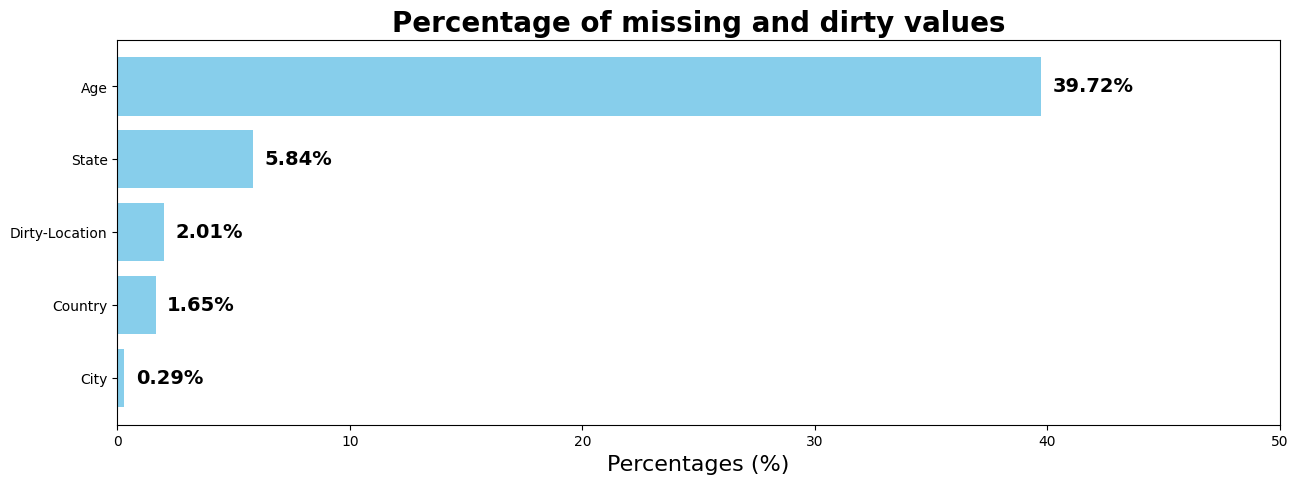

In [248]:
# plot with percentage of dirty and missing values in user data
# Calculating the percentage of missing values for each column
missing_data = users_df.isnull().sum()
missing_data["Dirty-Location"] = users_df[users_df["Dirty-Location"] == True]["Dirty-Location"].count()
missing_percentage = (missing_data[missing_data > 0] / users_df.shape[0]) * 100
missing_percentage.sort_values(ascending=True, inplace=True)

fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(missing_percentage.index, missing_percentage, color='skyblue')
for i, (value, name) in enumerate(zip(missing_percentage, missing_percentage.index)):
    ax.text(value+0.5, i, f"{value:.2f}%", ha='left', va='center', fontweight='bold', fontsize=14, color='black')
ax.set_xlim([0, 50])

plt.title("Percentage of missing and dirty values", fontweight='bold', fontsize=20)
plt.xlabel('Percentages (%)', fontsize=16)
plt.show()

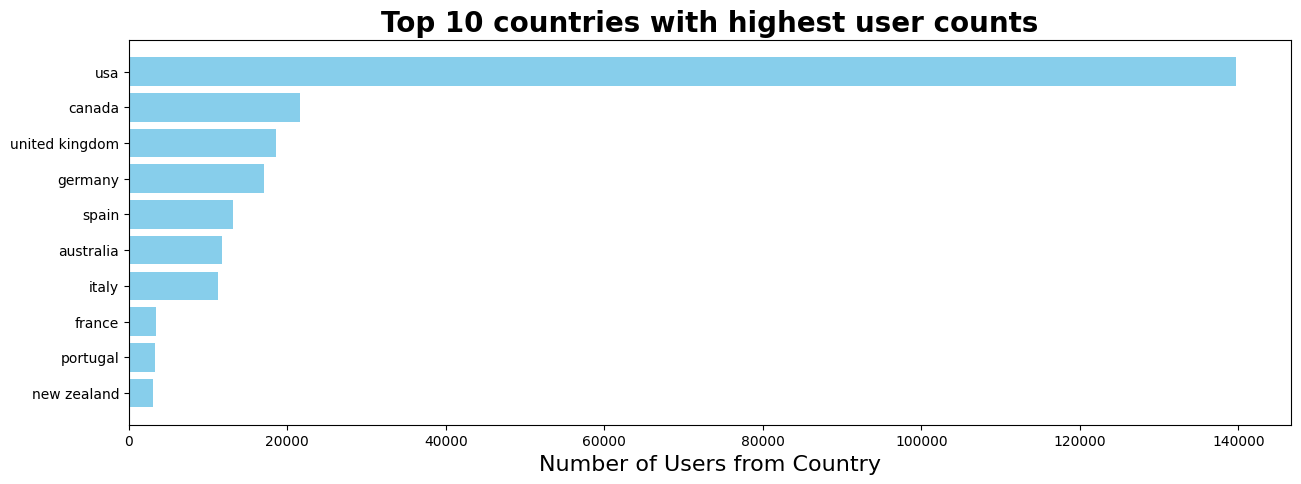

In [263]:
top_10_countries = users_df["Country"].value_counts().head(10).sort_values()

fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(top_10_countries.index, top_10_countries, color='skyblue')
plt.title("Top 10 countries with highest user counts", fontweight='bold', fontsize=20)
plt.xlabel('Number of Users from Country', fontsize=16)
plt.show()

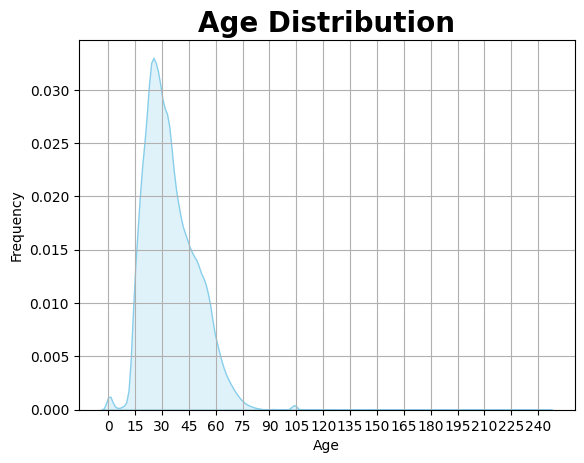

In [163]:
# plot with user age distribution
age_data = users_df['Age'].dropna()

sns.kdeplot(age_data, fill=True, color='skyblue')
plt.xticks(np.arange(0, age_data.max()+1, 15))
plt.title('Age Distribution', fontweight='bold', fontsize=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

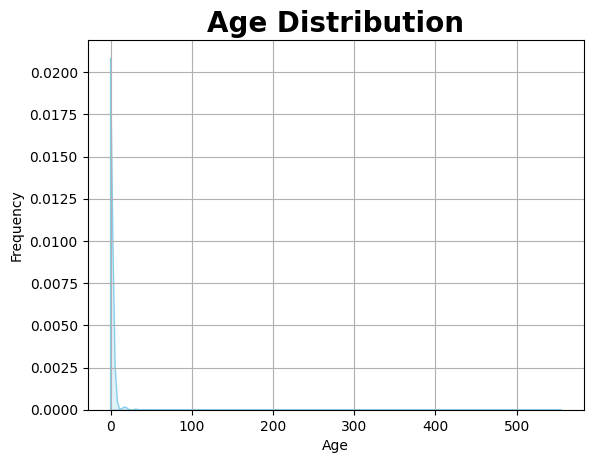

In [166]:
# plot with user bought distribution
buying_data = users_df['Unique-Books-Bought']

sns.kdeplot(buying_data, fill=True, color='skyblue')
plt.title('Buying Distribution', fontweight='bold', fontsize=20)
plt.xlabel('Unique Books per User')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

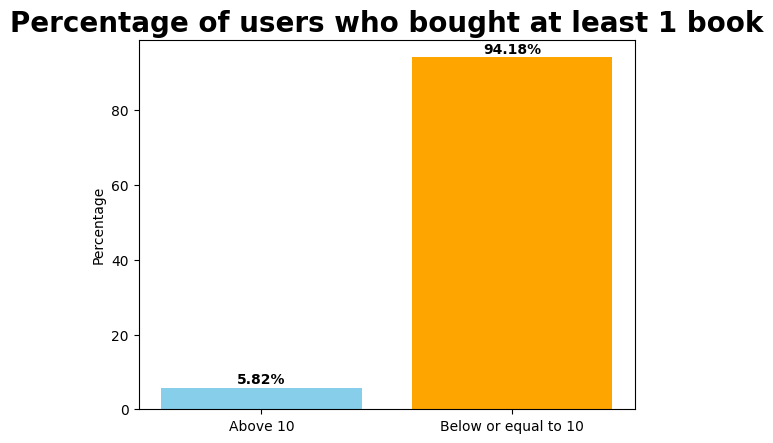

In [234]:
above_50_percent = users_df[users_df['Unique-Books-Bought'] >= 1]['Unique-Books-Bought'].count() / len(users_df) * 100
below_50_percent = users_df[users_df['Unique-Books-Bought'] == 0]['Unique-Books-Bought'].count() / len(users_df) * 100


plt.bar(['Above 10', 'Below or equal to 10'], [above_50_percent, below_50_percent], color=['skyblue', 'orange'])
for i, percentage in enumerate([above_50_percent, below_50_percent]):
    plt.text(i, percentage + 1, f'{percentage:.2f}%', ha='center', fontweight='bold', fontsize=10, color='black')
plt.title('Percentage of users who bought at least 1 book', fontweight='bold', fontsize=20)
plt.ylabel('Percentage')
plt.show()

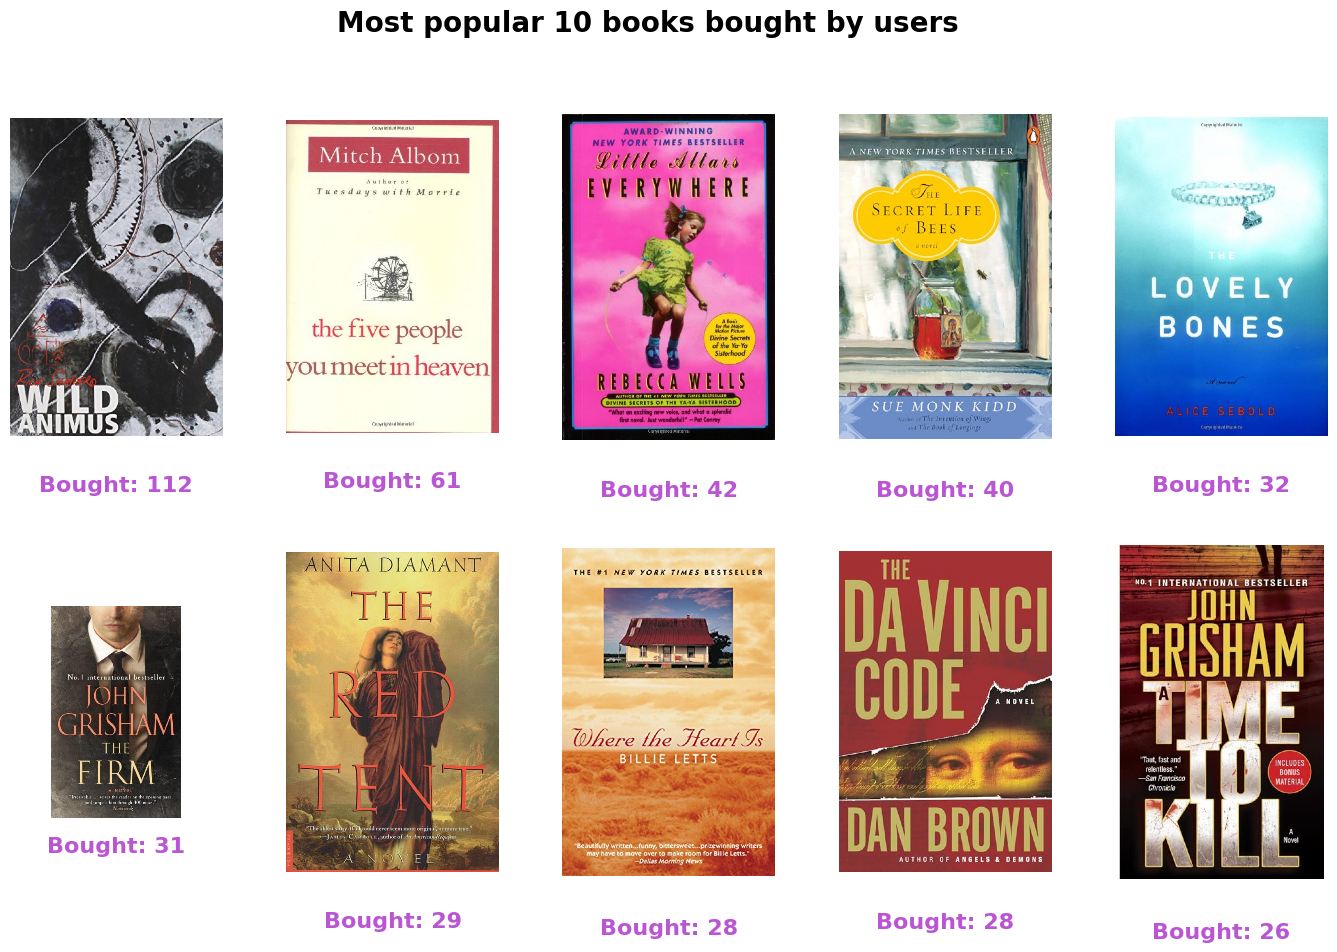

In [247]:
# plot with top 10 most frequent books bought
top_10_isbns = ratings_df["ISBN"].value_counts().head(20)
top_10_books = books_df[books_df.index.isin(top_10_isbns.index.tolist())].head(10).reset_index()
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:97.0) Gecko/20100101 Firefox/97.0'}

fig, ax = plt.subplots(2, 5, figsize=(17,10))
fig.suptitle("Most popular 10 books bought by users", fontweight='bold', fontsize=20)

for i, row in top_10_books.iterrows():
    url = row["Image-URL-L"]
    img = Image.open(requests.get(url, headers=headers, stream = True).raw)
    ax[i // 5, i % 5].imshow(img)
    ax[i // 5, i % 5].axis("off")
    ax[i // 5, i % 5].set_title(f"Bought: {top_10_isbns.iloc[i]}", y=-0.2, color="mediumorchid", fontweight='bold', fontsize=16)

plt.subplots_adjust(wspace=0.3, hspace=0.3)
plt.show()

## Recommendation systems

In [19]:
df = books_df.merge(ratings_df, on = 'ISBN')
df = df.dropna() # we can drop null values because we cant use every rating [memory restrictions]
df = df.drop(columns=["Image-URL-S","Image-URL-M", "Image-URL-L"], axis=1)

In [21]:
user_item_pivot_matrix_df = df.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating', fill_value=0)
user_item_pivot_matrix_df.head()

ISBN,0000913154,0002116286,0002157950,0002212080,0002215497,0002215810,0002226162,000222674X,0002227150,0002231352,...,9963842801,9977671281,9997404580,9997407210,9997412044,B000051WXP,B00005NCS7,B00008WFXL,B0000E63CJ,B0001GDNCK
User-ID,,,,,,,,,,,,,,,,,,,,,
100009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100053,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100088,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from scipy.sparse.linalg import svds

NUMBER_OF_FACTORS_MF = 10 # hyperparameter

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(user_item_pivot_matrix_df.values, k = NUMBER_OF_FACTORS_MF)

In [27]:
sigma = np.diag(sigma)
sigma.shape

(10, 10)

In [28]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 3.29339241e-20,  4.26254609e-35,  1.76552173e-35, ...,
         0.00000000e+00,  9.40700423e-37,  0.00000000e+00],
       [-1.14616909e-18,  3.49933776e-32, -2.97165609e-34, ...,
         0.00000000e+00, -1.05429315e-35,  0.00000000e+00],
       [-4.42495644e-12,  3.58985471e-24,  8.03510865e-27, ...,
         0.00000000e+00,  1.87163588e-26,  0.00000000e+00],
       ...,
       [-5.02221942e-18, -7.98125787e-35,  1.06974486e-35, ...,
         0.00000000e+00, -2.82890081e-36,  0.00000000e+00],
       [ 7.35812512e-18,  4.17852759e-33, -1.00200285e-34, ...,
         0.00000000e+00,  6.73468040e-35,  0.00000000e+00],
       [-1.35256710e-07,  1.95327995e-21,  2.23003309e-24, ...,
         0.00000000e+00,  1.34226189e-23,  0.00000000e+00]])

In [39]:
def top_cosine_similarity(data, book_id, top_n=10):
    index = book_id 
    book_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(book_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

def similar_books(book_user_rating, book_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    book_user_rating[book_user_rating.ISBN == book_id]['Book-Title'].values[0]))
    for id in top_indexes + 1:
        print(book_user_rating[book_user_rating.ISBN== id]['Book-Title'].values[0])

In [40]:
k = 50
isbn = "0399135782"
top_n = 3
sliced = Vt.T[:, :k] # representative data
# top_cosine_sim funktioniert gerade nicht, weil ich davor mit ISBNs arbeite
# aber das selbst programmieren zu müssen scheint eh nicht der beste Weg zu sein, lieber sklearn sachen angucken, die scheinen dort besser zu passen
similar_books(df, isbn, top_cosine_similarity(sliced, isbn, top_n))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [43]:
Vt.T[:, :k]

array([[-1.59242852e-01,  2.08735090e-04, -2.56241076e-06, ...,
        -9.43426767e-08,  3.60954048e-07,  2.19971557e-04],
       [-1.35929624e-18,  2.44757016e-22, -4.01050543e-17, ...,
         5.33994705e-18, -1.32136717e-19,  2.05405342e-19],
       [ 0.00000000e+00,  1.87048683e-34, -1.06000628e-34, ...,
        -1.06757915e-18, -1.86347248e-20, -2.11758237e-22],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 9.82718598e-20,  2.85037209e-20,  1.33643192e-20, ...,
         1.78793860e-20,  1.13710968e-20, -1.74303675e-20],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [35]:
df

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,180297,0
1,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,136509,0
2,0399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,8,0
3,0440234743,The Testament,John Grisham,1999,Dell,213733,0
4,0440234743,The Testament,John Grisham,1999,Dell,273979,9
...,...,...,...,...,...,...,...
44930,0738702315,Llewellyn's Witchy Day Planner 2004 Calendar,Ellen Dugan,2003,Llewellyn Publications,269009,4
44931,031070264X,Lily's Church Camp Adventure (Young Women of F...,Nancy N. Rue,2003,Zonderkidz,269557,8
44932,0764224808,Cross My Heart (Hidden Diary),Sandra Byrd,2001,Bethany House Publishers,269557,10
44933,1584857447,True Stories: Girls' Inspiring Stories of Cour...,Trula Magruder,2003,American Girl,269557,10
